# 1D Finite Element Solver
We aim to solve a differential equation for a 1 dimensional case with the form
$$
- \frac{\partial}{\partial x} \alpha(x) \cdot \frac{\partial \Phi (x)}{\partial x} + \beta(x) \cdot \Phi (x)=f (x)
$$
with the galerkin method. Details can be found in the [lecture notes]("G:\My Drive\HKA EITB\Semester 6\Methoden der Feldberechnung\GalerkinVerfahren.pdf"), page 13.

To do so, we split the domain of the function given as boundary values in smaller parts and solve a linear equations system comprising all elements.

## Initialise the Exercise Information

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import functions as myfunc

In [15]:
def alpha(x):
    """
    Piecewise function for alpha(x):
    - 3 in [1.5, 2.7]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1.5 <= x) & (x <= 2.7), 3.0, np.square(x))

def beta(x):
    """
    Piecewise function for beta(x):
    - x / (x+1) in [1, 2]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1 <= x) & (x <= 2), x / (x + 1), np.square(x))

def rhs(x):
    """
    Right-hand side f(x):
    - x in [2, 4]
    - x + 1 elsewhere
    """
    x = np.asarray(x)
    return np.where((2 <= x) & (x <= 4), x, x + 1)

In [16]:
DOMAIN_BOUNDARY = {
    "Lower Bound": 1,
    "Upper Bound": 4
}
BOUNDARY_CONDITION = {
    "Lower Bound": {
        "x": DOMAIN_BOUNDARY["Lower Bound"],
        "Phi": np.exp(DOMAIN_BOUNDARY["Lower Bound"])
    },
    "Upper Bound": {
        "x": DOMAIN_BOUNDARY["Upper Bound"],
        "Phi": np.exp(DOMAIN_BOUNDARY["Upper Bound"])
    }
}

## Define Elements

In [17]:
NUMBER_OF_NODES = 684
element_nodes = np.linspace(DOMAIN_BOUNDARY["Lower Bound"], DOMAIN_BOUNDARY["Upper Bound"], num=NUMBER_OF_NODES)
print(element_nodes)

element_indices = myfunc.get_edge_indices(element_nodes)
print(element_indices)

# Append boundary dict with index position of x value
BOUNDARY_CONDITION["Lower Bound"]["x Index"] = np.where(element_nodes == BOUNDARY_CONDITION["Lower Bound"]["x"])[0][0]
BOUNDARY_CONDITION["Upper Bound"]["x Index"] = np.where(element_nodes == BOUNDARY_CONDITION["Upper Bound"]["x"])[0][0]
print(BOUNDARY_CONDITION)

[1.         1.00439239 1.00878477 1.01317716 1.01756955 1.02196193
 1.02635432 1.03074671 1.03513909 1.03953148 1.04392387 1.04831625
 1.05270864 1.05710102 1.06149341 1.0658858  1.07027818 1.07467057
 1.07906296 1.08345534 1.08784773 1.09224012 1.0966325  1.10102489
 1.10541728 1.10980966 1.11420205 1.11859444 1.12298682 1.12737921
 1.1317716  1.13616398 1.14055637 1.14494876 1.14934114 1.15373353
 1.15812592 1.1625183  1.16691069 1.17130307 1.17569546 1.18008785
 1.18448023 1.18887262 1.19326501 1.19765739 1.20204978 1.20644217
 1.21083455 1.21522694 1.21961933 1.22401171 1.2284041  1.23279649
 1.23718887 1.24158126 1.24597365 1.25036603 1.25475842 1.25915081
 1.26354319 1.26793558 1.27232796 1.27672035 1.28111274 1.28550512
 1.28989751 1.2942899  1.29868228 1.30307467 1.30746706 1.31185944
 1.31625183 1.32064422 1.3250366  1.32942899 1.33382138 1.33821376
 1.34260615 1.34699854 1.35139092 1.35578331 1.3601757  1.36456808
 1.36896047 1.37335286 1.37774524 1.38213763 1.38653001 1.3909

## Create Domain Matrix by generating matrix values for each element

In [18]:
elements = []
for indices in element_indices:
    element = myfunc.assemble_element(element_nodes, indices[0], indices[1], alpha, beta, rhs)
    elements.append(element)

print(elements)

[{'Start Index': np.int64(0), 'End Index': np.int64(1), 'Coefficients': array([[ 228.66849763, -228.66739833],
       [-228.66739833,  228.66849763]]), 'Right Hand Side': array([0.00439721, 0.00439721])}, {'Start Index': np.int64(1), 'End Index': np.int64(2), 'Coefficients': array([[ 230.677284 , -230.6761823],
       [-230.6761823,  230.677284 ]]), 'Right Hand Side': array([0.00440686, 0.00440686])}, {'Start Index': np.int64(2), 'End Index': np.int64(3), 'Coefficients': array([[ 232.69485514, -232.69375105],
       [-232.69375105,  232.69485514]]), 'Right Hand Side': array([0.0044165, 0.0044165])}, {'Start Index': np.int64(3), 'End Index': np.int64(4), 'Coefficients': array([[ 234.72121105, -234.72010458],
       [-234.72010458,  234.72121105]]), 'Right Hand Side': array([0.00442615, 0.00442615])}, {'Start Index': np.int64(4), 'End Index': np.int64(5), 'Coefficients': array([[ 236.75635172, -236.75524288],
       [-236.75524288,  236.75635172]]), 'Right Hand Side': array([0.0044358, 0

In [19]:
len(BOUNDARY_CONDITION)

2

In [20]:
coefficients_matrix, rhs_matrix = myfunc.create_globaL_les(elements, BOUNDARY_CONDITION)
print(coefficients_matrix)
print(rhs_matrix)

[[  459.34578164  -230.6761823      0.         ...     0.
      0.             0.        ]
 [ -230.6761823    463.37213915  -232.69375105 ...     0.
      0.             0.        ]
 [    0.          -232.69375105   467.41606619 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...  7237.46113644
  -3622.68247027     0.        ]
 [    0.             0.             0.         ... -3622.68247027
   7253.41731519 -3630.66487506]
 [    0.             0.             0.         ...     0.
  -3630.66487506  7269.3910636 ]]
[[6.21591238e+02]
 [8.82335918e-03]
 [8.84265224e-03]
 [8.86194530e-03]
 [8.88123836e-03]
 [8.90053142e-03]
 [8.91982448e-03]
 [8.93911754e-03]
 [8.95841059e-03]
 [8.97770365e-03]
 [8.99699671e-03]
 [9.01628977e-03]
 [9.03558283e-03]
 [9.05487589e-03]
 [9.07416895e-03]
 [9.09346201e-03]
 [9.11275507e-03]
 [9.13204813e-03]
 [9.15134119e-03]
 [9.17063425e-03]
 [9.18992731e-03]
 [9.20922037e-03]
 [9.22851343e-03]
 [9.24780649e-03]


In [21]:
solution = myfunc.solve_leq(coefficients_matrix, rhs_matrix, BOUNDARY_CONDITION, NUMBER_OF_NODES)
print(solution)

[[ 2.71828183]
 [ 2.80041482]
 [ 2.88182114]
 [ 2.96251102]
 [ 3.04249453]
 [ 3.12178155]
 [ 3.20038176]
 [ 3.27830469]
 [ 3.3555597 ]
 [ 3.43215596]
 [ 3.5081025 ]
 [ 3.58340817]
 [ 3.65808167]
 [ 3.73213156]
 [ 3.80556622]
 [ 3.87839392]
 [ 3.95062276]
 [ 4.02226071]
 [ 4.0933156 ]
 [ 4.16379511]
 [ 4.23370682]
 [ 4.30305815]
 [ 4.37185642]
 [ 4.4401088 ]
 [ 4.50782236]
 [ 4.57500404]
 [ 4.64166067]
 [ 4.70779895]
 [ 4.7734255 ]
 [ 4.8385468 ]
 [ 4.90316923]
 [ 4.96729908]
 [ 5.03094252]
 [ 5.09410563]
 [ 5.15679439]
 [ 5.21901467]
 [ 5.28077225]
 [ 5.34207284]
 [ 5.40292204]
 [ 5.46332535]
 [ 5.52328819]
 [ 5.58281592]
 [ 5.64191377]
 [ 5.70058693]
 [ 5.75884048]
 [ 5.81667942]
 [ 5.87410871]
 [ 5.93113318]
 [ 5.98775762]
 [ 6.04398675]
 [ 6.09982518]
 [ 6.15527749]
 [ 6.21034818]
 [ 6.26504166]
 [ 6.3193623 ]
 [ 6.37331439]
 [ 6.42690216]
 [ 6.48012977]
 [ 6.53300133]
 [ 6.58552089]
 [ 6.63769242]
 [ 6.68951984]
 [ 6.74100703]
 [ 6.79215779]
 [ 6.84297587]
 [ 6.89346498]
 [ 6.94362

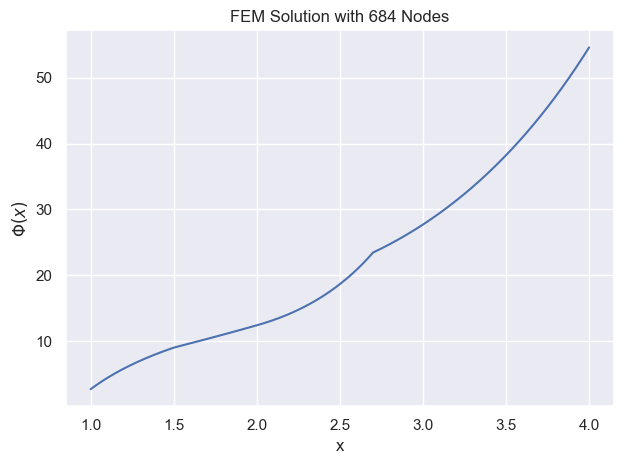

In [24]:
plt.plot(element_nodes, solution)
plt.xlabel("x")
plt.ylabel(r"$\Phi (x)$")
plt.title(f"FEM Solution with {NUMBER_OF_NODES} Nodes")

plt.tight_layout()
plt.show()